# Rocket assignment

##### Laurent Pétré & Ilan Renous

We are going to integrate the speed and the height of a rocket under given conditions. To do so, we are going to use Euler's method.

In [26]:
# We import the libraries we will need
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

## Rocket motion equations

The equations of motion for a rocket in purely vertical flight are given by

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

where,

* $h$ is the altitude of the rocket

* $m_s = 50kg$ is the weight of the rocket shell

* $g = 9.81 \frac{m}{s^2}$

* $\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

* $A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

* $v_e = 325 \frac{m}{s}$ is the exhaust speed

* $C_D = 0.15 $ is the drag coefficient

* $m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where the time-varying burn rate  $\dot{m}_p$  is 20kg/s during the five first seconds, and then drop to zero.


### Defining  functions

We are going to define a vectorial function of all the variables above, which is going to express the following vector: $$\begin{equation}
\vec{f}  = \begin{pmatrix} \dot{m}_{p} \\ \dot{h} \\ \dot{v} \end{pmatrix}
\end{equation}$$.

In [27]:
def mpdot(t):
    if t < 5.0 :
        return -20.0
    else:
        return 0.0

def f(t, u, mpdot_func, ms = 50.0, g = -9.81, rho = 1.091, r = 0.5, ve = 325, CD = 0.15):
    u_ = npy.zeros(3)

    # Mass u_[0]
    u_[0] = mpdot_func(t)
    
    # Height u_[1]
    u_[1] = u[2]

    # Speed u_[2]
    u_[2] = g - (0.5*rho*npy.pi*(r**2)*CD*u[2]*npy.abs(u[2]))/(ms+u[0]) - (u_[0]*ve)/(ms+u[0])

    return u_

## Euler's Method

Let $u$ be a function of time $t$. the derivative of $u$ is a fonction $f(u)$.

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula:

$$u_{n+1} = u_n + \Delta t \,f(t_n, u_n).$$

This formula is called **Euler's method**.

In Python that gives:

In [28]:
def solve(t, u, f_func, stop_func, dt):
    i = 0
    while True :
        u[:,i+1] = u[:,i] + dt*f_func(t[i], u[:,i])

        if stop_func(t, u, i) :
            return i

        i = i + 1

We used the stop function which stops the iteration once the rocket has returned to the ground. That also allows us to know at what time this happens.

In [29]:
def stop(t, u, i):
    return (u[1, i] < 0)

## Solve

Now we are going to discretize time and define the following vector: $$\begin{equation}
\vec{u}_{n}  = \begin{pmatrix} m_{p} \\ h \\ v \end{pmatrix}\end{equation}$$ which will contain the information about the mass, height and speed of the rocket at a time $t_n$.

In [30]:
dt = 0.1
t_to_sim = 40.0

t = npy.linspace(0, t_to_sim, int(t_to_sim/dt))
u = npy.zeros((3, int(t_to_sim/dt)))
u[0, 0] = 100.0

We are now going to use all the fonctions defined above to solve this problem. We are in fact going to solve the following equation:$$\begin{equation}\ \vec{u}_{n+1}=\vec{u}_{n}+ \vec{f}_{n}\Delta t \ \end{equation}$$ which is a vectorial equivalent of the Euler's method given above.

In [31]:
i = solve(t, u, lambda t, u: f(t, u, mpdot), stop, dt)

## Solutions
Here is the graph of the mass, height and speed of the rocket as function of time: 

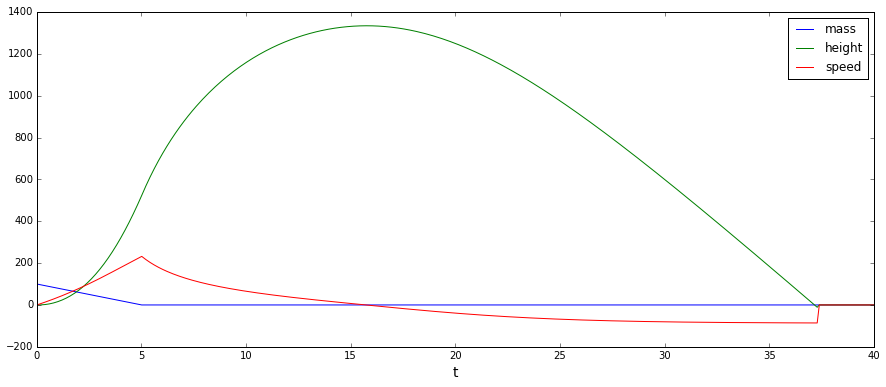

In [32]:
plt.figure(figsize=(15,6))

plt.plot(t, u[0,:])
plt.plot(t, u[1,:])
plt.plot(t, u[2,:])

plt.xlabel('t', fontsize=14)
plt.legend(['mass','height','speed'])

plt.show()

1. At time $t=3.2s$, the mass of rocket propellant remaining in the rocket is: $32.0 kg$

2. The maximum speed of the rocket is: $232.11\frac{m}{s}$ this occur after $5.01s$. The altitude at this time is: $523.52m$
    
3. The rocket's maximum altitude during flight is $1334.18m$ and occurs at time $15.74s$

4. The rocket impacts the ground at time $37.19s$ and its velocity is $-86.01\frac{m}{s}$

In [33]:
print("Mass of rocket propellant at 3.2s :", u[0, int(3.2/dt)])
print("Time and speed when return to the ground :", t[i], u[2, i])
hmax = npy.amax(u[1,:])
hmax_i = npy.argmax(u[1,:])
print("Maximum height and time :", hmax, t[hmax_i])
vmax = npy.amax(u[2,:])
vmax_i = npy.argmax(u[2,:])
print("Maximum speed, time and height :", vmax, t[vmax_i], u[1, vmax_i])

Mass of rocket propellant at 3.2s : 36.0
Time and speed when return to the ground : 37.1929824561 -86.0068349838
Maximum height and time : 1334.18294543 15.7393483709
Maximum speed, time and height : 232.106133413 5.01253132832 523.522834292


##### Source

(1) We used the following lectures https://github.com/numerical-mooc/numerical-mooc available under Creative Commons Attribution license CC-BY 4.0, (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

---
###### The cell below loads the style of this notebook. 

In [34]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())